In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
import warnings
import pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize']=(15, 8)

In [2]:
df = pd.read_csv('data/m0001_train.csv')

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  7000 non-null   float64
 1   feature2  7000 non-null   float64
 2   feature3  7000 non-null   float64
 3   feature4  7000 non-null   float64
 4   feature5  7000 non-null   float64
 5   feature6  7000 non-null   float64
 6   feature7  7000 non-null   float64
 7   target    7000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 437.6 KB


In [4]:
X = df.drop(['target'], axis=1)
Y = df.target

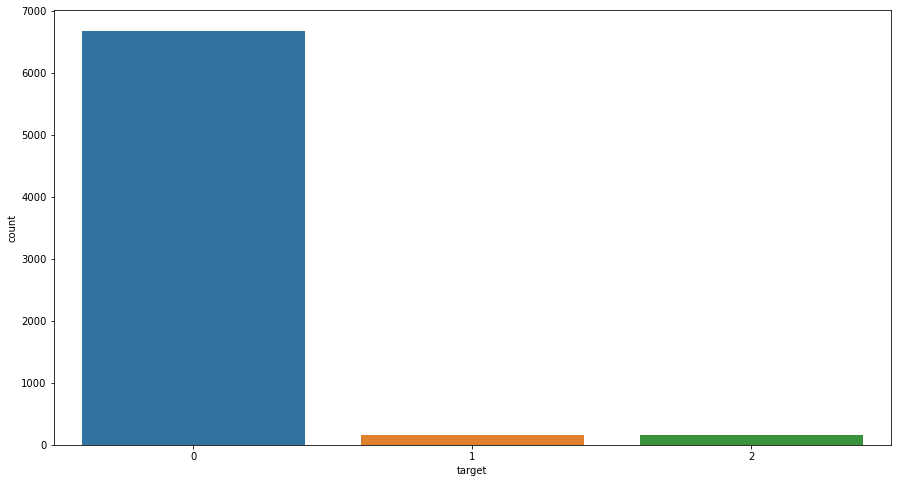

In [5]:
sns.countplot(x= Y);

In [6]:
corr = X.corr(method='pearson')

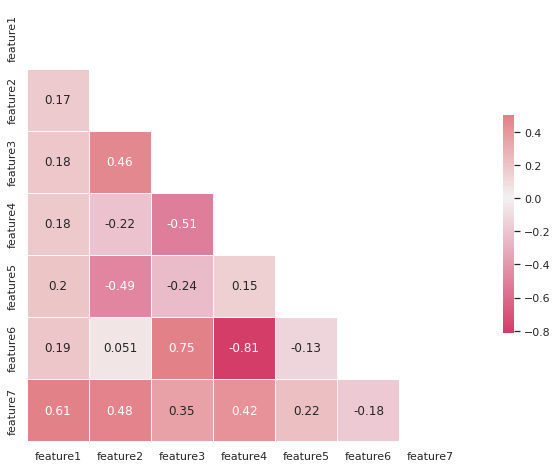

In [7]:
sns.set(style='white')  

mask=np.triu(np.ones_like(corr, dtype=bool)) 

cmap=sns.diverging_palette(0, 10, as_cmap=True) 

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

In [8]:
# vamos a tratar de balancear el dataset con dos técnicas de oversampled
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

In [9]:
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(X, Y)

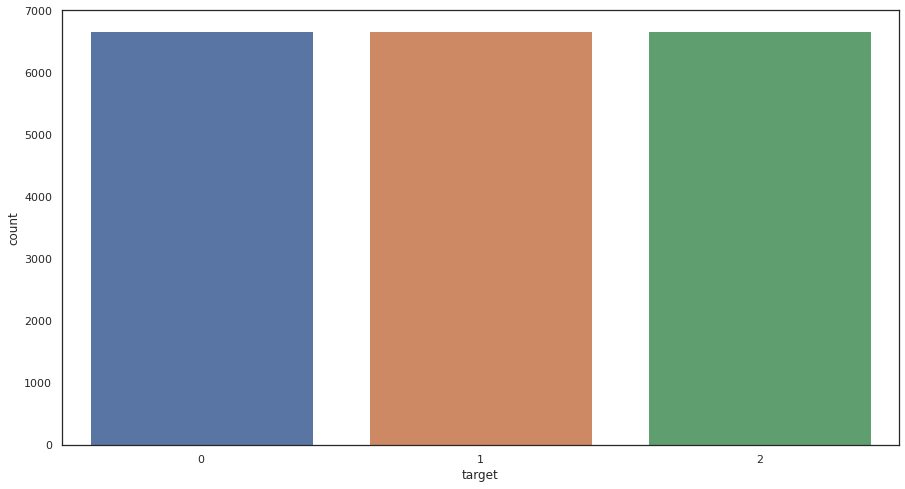

In [10]:
sns.countplot(x=Y_smote);

In [11]:
corr_smote= X_smote.corr(method='pearson')


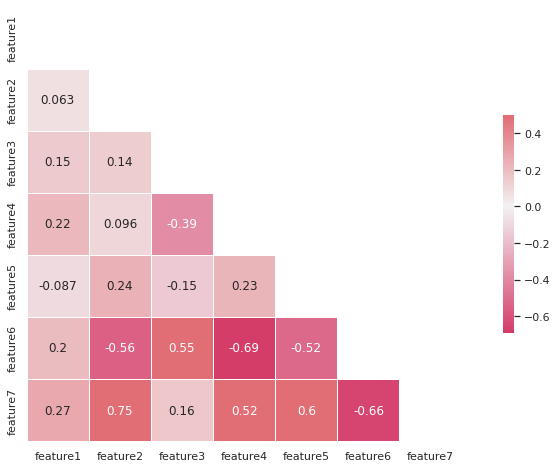

In [12]:

sns.set(style='white') 

mask=np.triu(np.ones_like(corr_smote, dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True) 


# heatmap o mapa de calor

sns.heatmap(corr_smote,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

In [13]:
corr_ros= X_ros.corr(method='pearson')

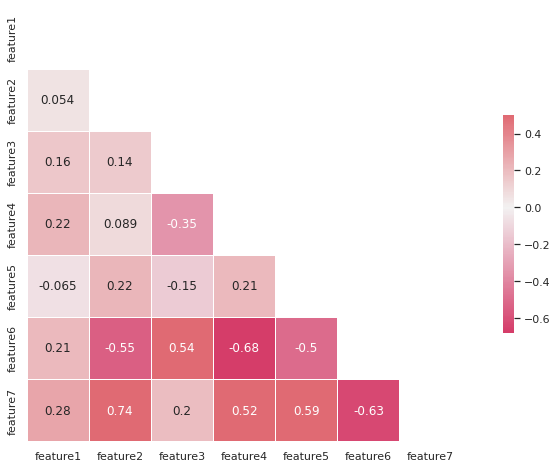

In [14]:
sns.set(style='white')  # estilo blanco

mask=np.triu(np.ones_like(corr_ros, dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True) 

sns.heatmap(corr_ros,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

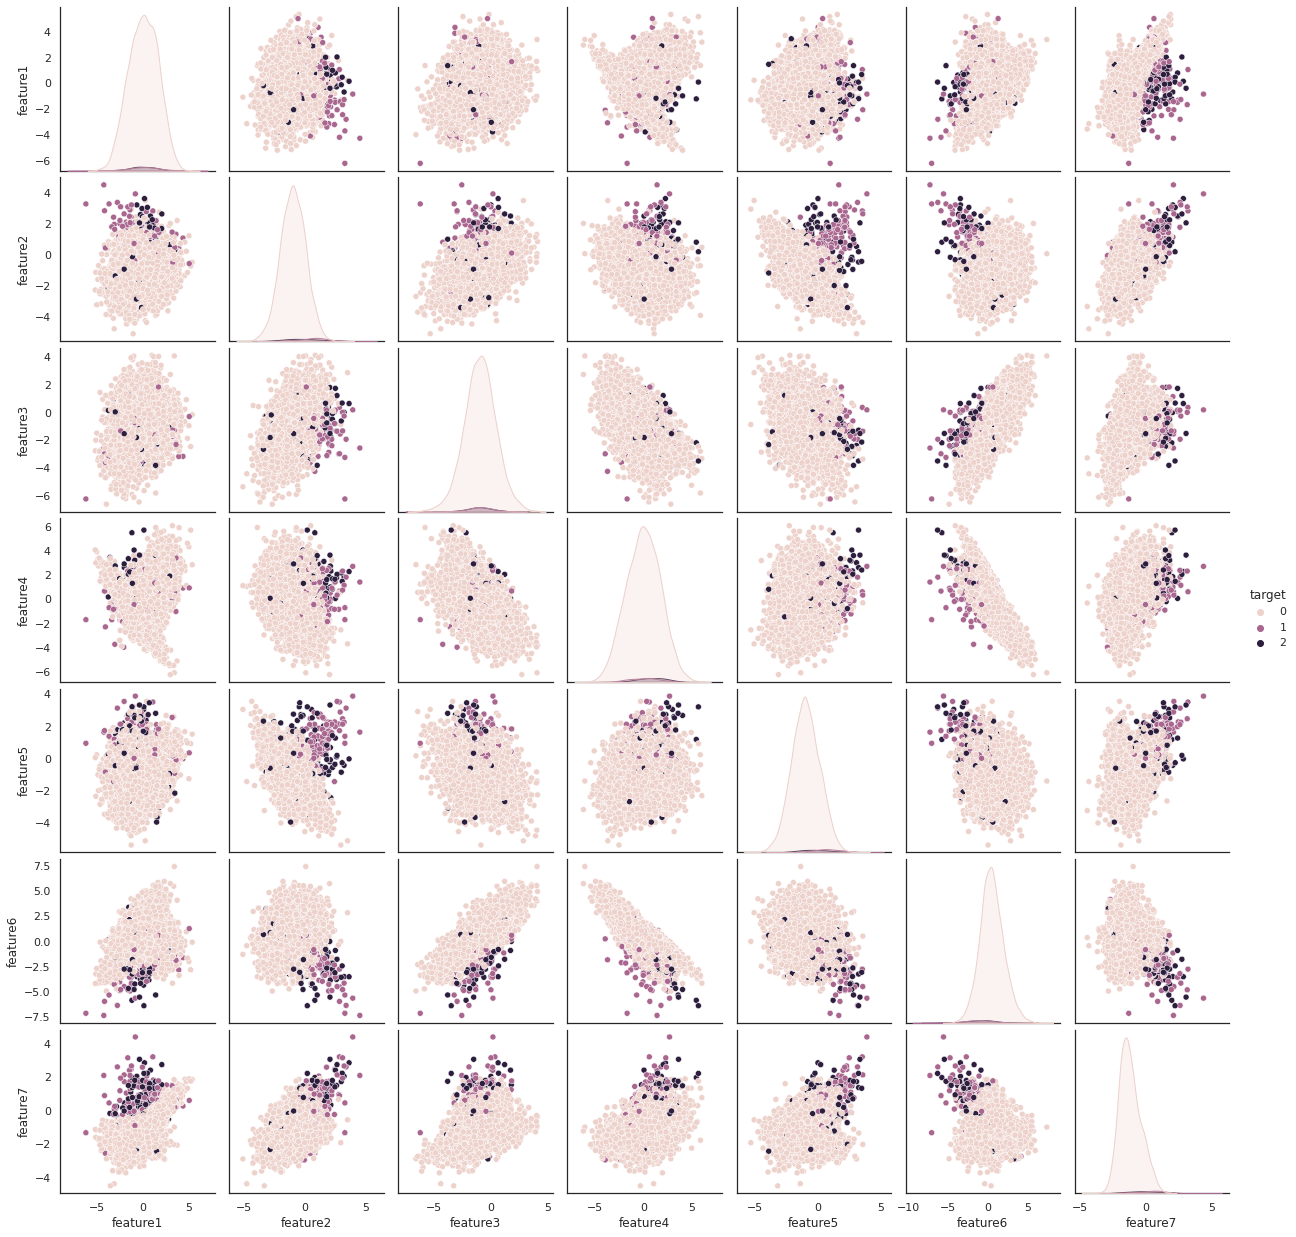

In [15]:
sns.pairplot(df, hue='target');

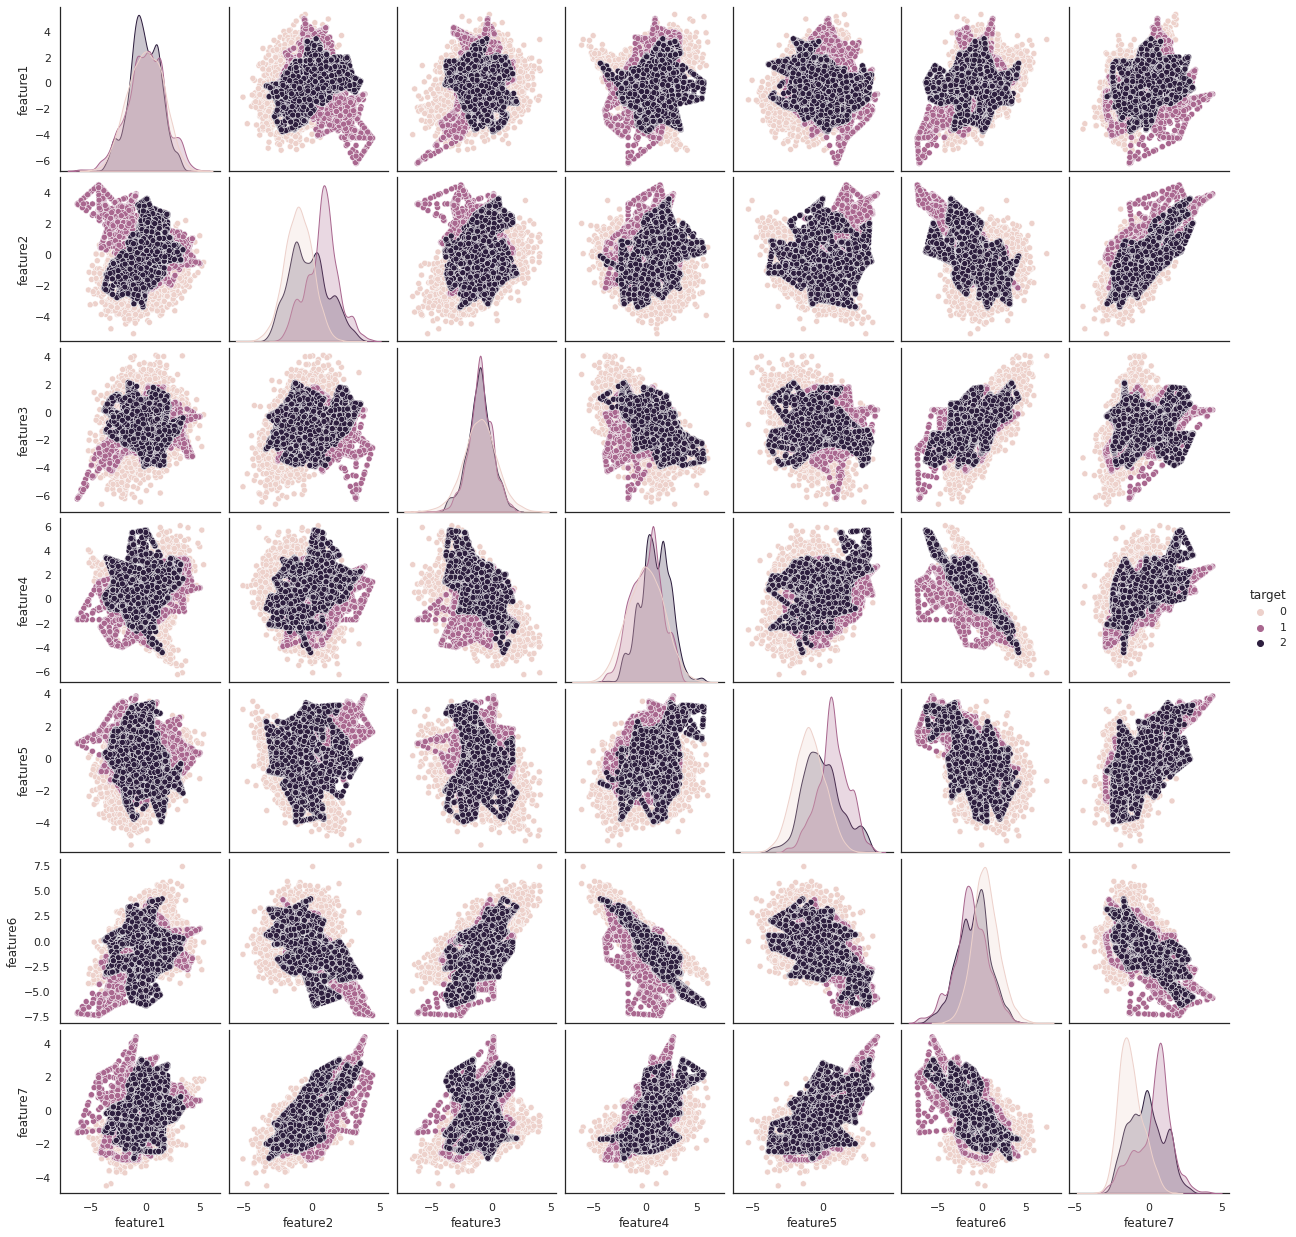

In [16]:
X_smote['target']= Y_smote
sns.pairplot(X_smote, hue='target');

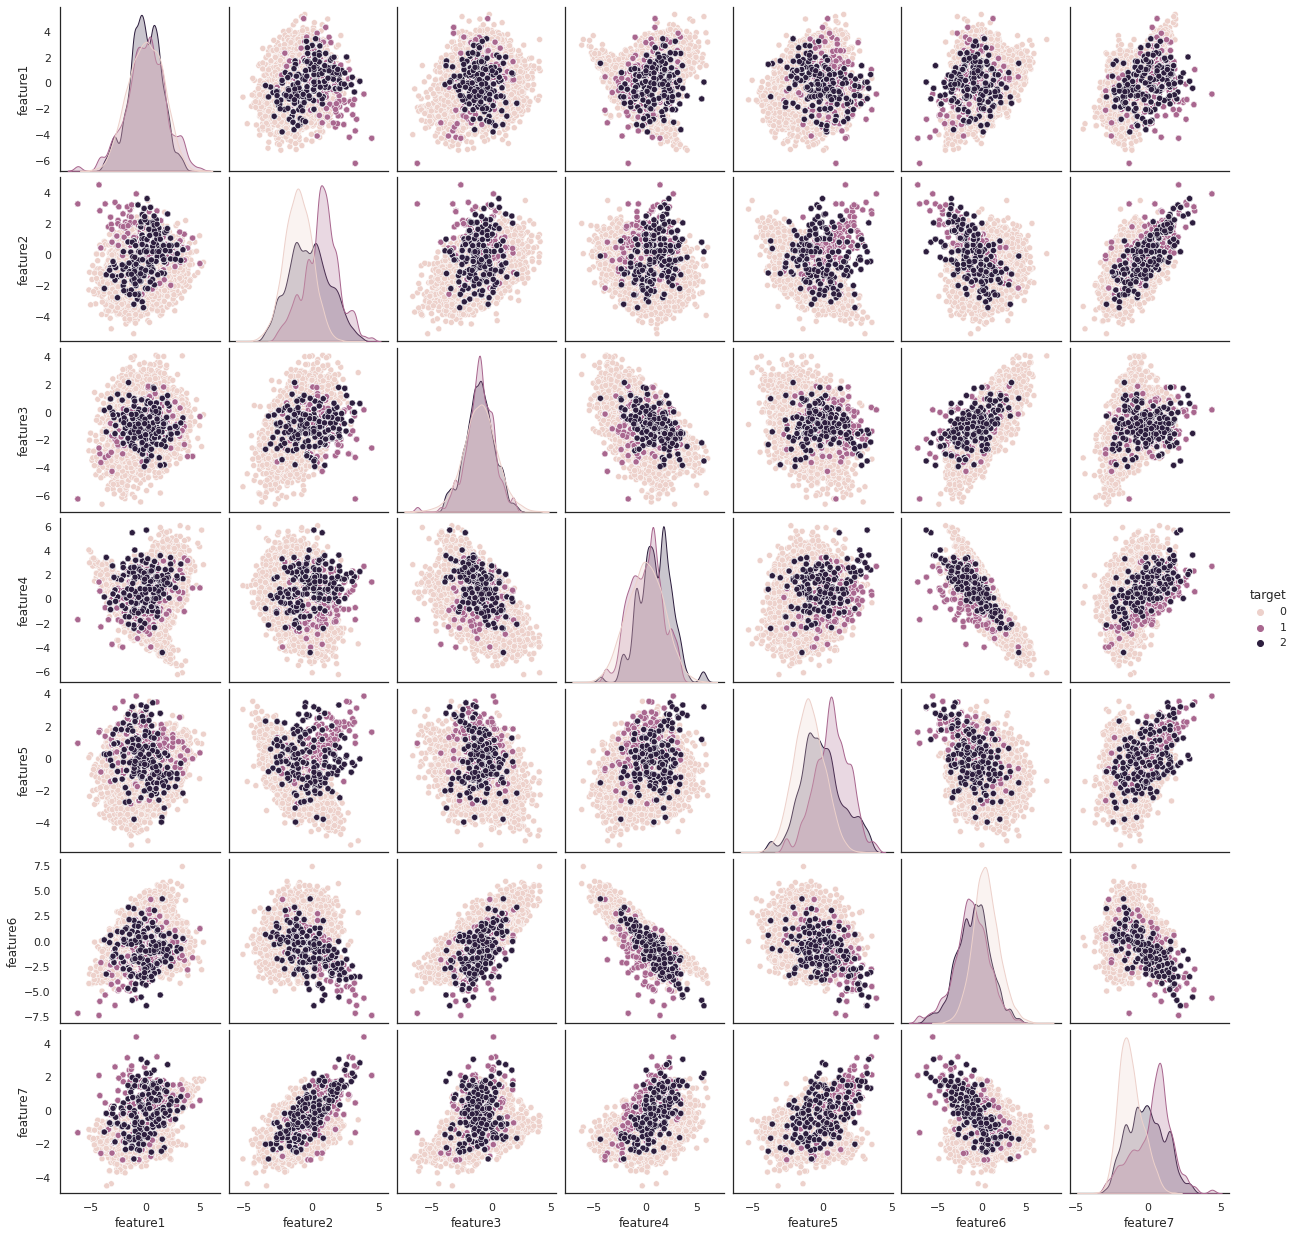

In [17]:
X_ros['target']= Y_ros
sns.pairplot(X_ros, hue='target');

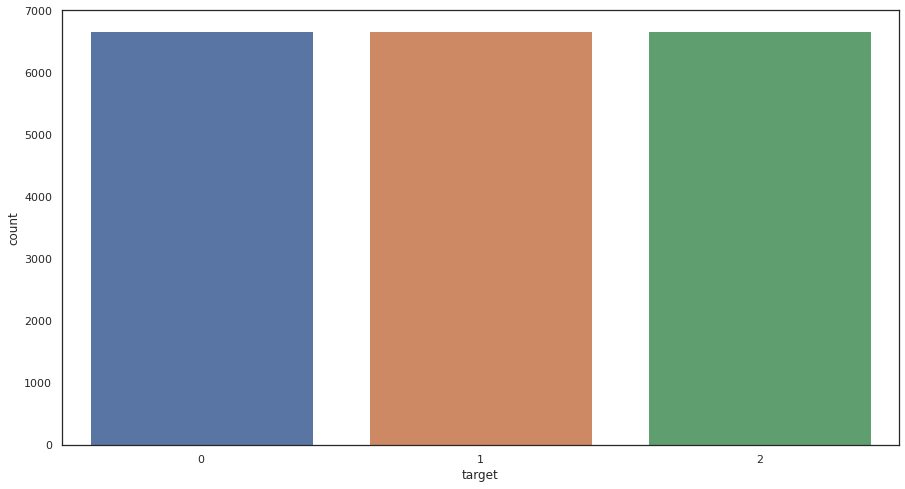

In [32]:
sns.countplot(x=Y_ros);

In [18]:
X_smote = X_smote.drop(['target'], axis=1)

In [19]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20034 entries, 0 to 20033
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  20034 non-null  float64
 1   feature2  20034 non-null  float64
 2   feature3  20034 non-null  float64
 3   feature4  20034 non-null  float64
 4   feature5  20034 non-null  float64
 5   feature6  20034 non-null  float64
 6   feature7  20034 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)

In [21]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote,Y_smote, test_size = 0.20, random_state=42)

In [22]:
modelRF = RandomForestClassifier(n_estimators = 1500, max_depth = 100, n_jobs = -1, criterion = 'entropy', min_samples_split = 3, warm_start = True)

Puntuación f1_score de los datos tratados con smote: 0.9798856786650689
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1303
           1       0.98      0.99      0.99      1346
           2       0.98      0.98      0.98      1358

    accuracy                           0.98      4007
   macro avg       0.98      0.98      0.98      4007
weighted avg       0.98      0.98      0.98      4007

--------------------


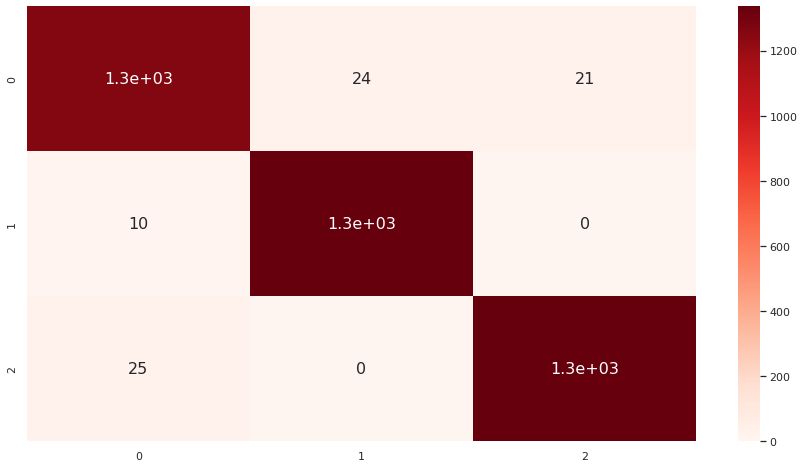

In [56]:
modelRF.fit(X_train_smote,Y_train_smote)
predict = modelRF.predict(X_test_smote)
array_smote = confusion_matrix(predict, Y_test_smote)

df_res_smote = pd.DataFrame(array_smote)

print(f"Puntuación f1_score de los datos tratados con smote:", f1_score( Y_test_smote ,predict, average='macro'))
print(metrics.classification_report(predict, Y_test_smote))
print("--------------------")
sns.set(font_scale =1)
plt.show(sns.heatmap(df_res_smote, annot = True, annot_kws={'size':16}, cmap = 'Reds'))

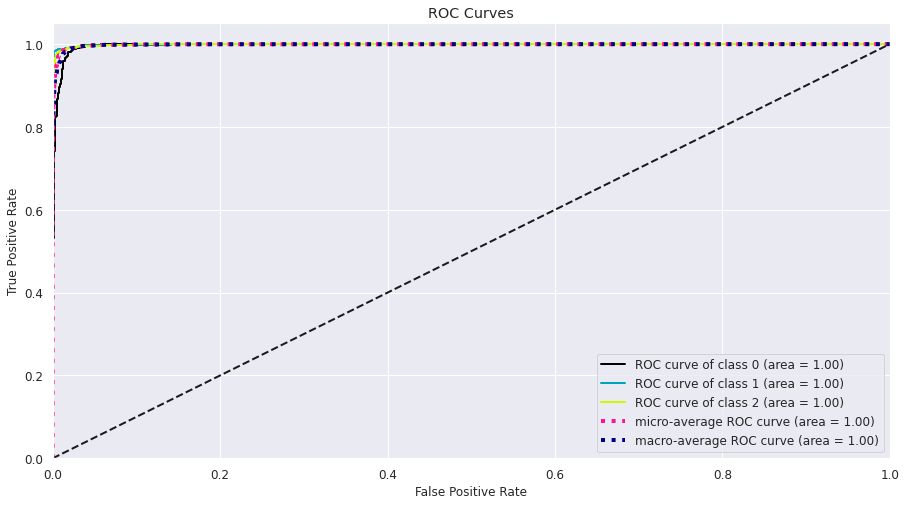

In [57]:
predict_prob_smote = modelRF.predict_proba(X_test_smote)
skplt.metrics.plot_roc(Y_test_smote, predict_prob_smote)
plt.show()

In [28]:
X_ros = X_ros.drop(['target'], axis=1)

KeyError: "['target'] not found in axis"

In [29]:
X_ros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20034 entries, 0 to 20033
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  20034 non-null  float64
 1   feature2  20034 non-null  float64
 2   feature3  20034 non-null  float64
 3   feature4  20034 non-null  float64
 4   feature5  20034 non-null  float64
 5   feature6  20034 non-null  float64
 6   feature7  20034 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [66]:
Y_ros

0        0
1        0
2        1
3        0
4        2
        ..
20029    2
20030    2
20031    2
20032    2
20033    2
Name: target, Length: 20034, dtype: int64

Puntuación f1_score de los datos tratados con smote: 0.9997480043002063
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1292
           1       1.00      1.00      1.00      1360
           2       1.00      1.00      1.00      1355

    accuracy                           1.00      4007
   macro avg       1.00      1.00      1.00      4007
weighted avg       1.00      1.00      1.00      4007

--------------------


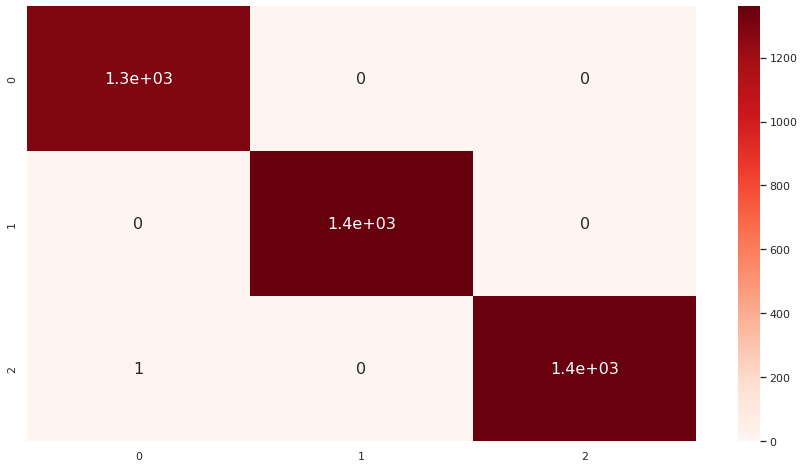

In [58]:
modelRF_ros = RandomForestClassifier(n_estimators = 1500, max_depth = 100, n_jobs = -1, criterion = 'entropy', min_samples_split = 3, warm_start = True)
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros,Y_ros, test_size = 0.20, random_state=42)
modelRF_ros.fit(X_train_ros,Y_train_ros)
predict_ros = modelRF_ros.predict(X_test_ros)
array_ros = confusion_matrix(predict_ros, Y_test_ros)

df_res_ros = pd.DataFrame(array_ros)

print(f"Puntuación f1_score de los datos tratados con smote:", f1_score( Y_test_ros ,predict_ros, average='macro'))
print(metrics.classification_report(predict_ros, Y_test_ros))
print("--------------------")
sns.set(font_scale =1)
plt.show(sns.heatmap(df_res_ros, annot = True, annot_kws={'size':16}, cmap = 'Reds'))

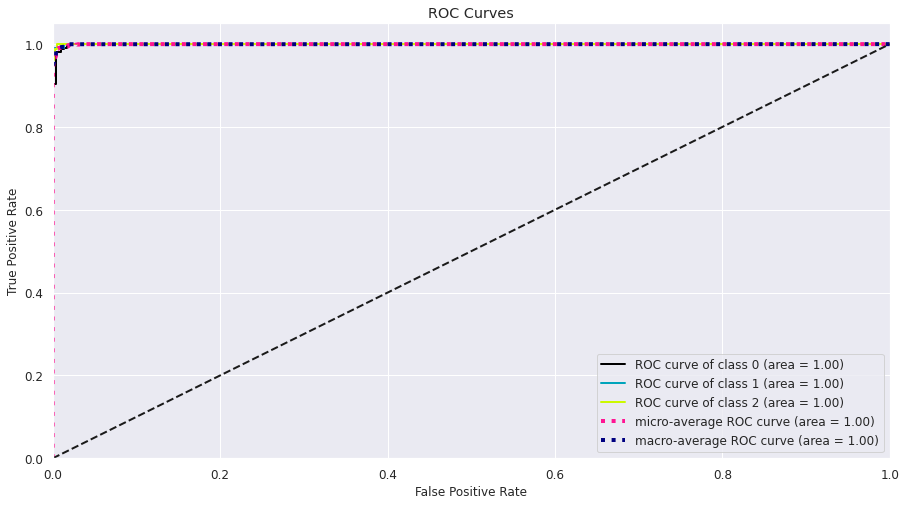

In [59]:
predict_prob_ros = modelRF.predict_proba(X_test_ros)
skplt.metrics.plot_roc(Y_test_ros, predict_prob_ros)
plt.show()

In [32]:
X_test_ros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4007 entries, 13883 to 9022
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  4007 non-null   float64
 1   feature2  4007 non-null   float64
 2   feature3  4007 non-null   float64
 3   feature4  4007 non-null   float64
 4   feature5  4007 non-null   float64
 5   feature6  4007 non-null   float64
 6   feature7  4007 non-null   float64
dtypes: float64(7)
memory usage: 250.4 KB


In [33]:
df_test = pd.read_csv('data/m0001_X_test.csv')

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  3000 non-null   float64
 1   feature2  3000 non-null   float64
 2   feature3  3000 non-null   float64
 3   feature4  3000 non-null   float64
 4   feature5  3000 non-null   float64
 5   feature6  3000 non-null   float64
 6   feature7  3000 non-null   float64
dtypes: float64(7)
memory usage: 164.2 KB


In [43]:
final_predict = modelRF.predict(df_test)

In [60]:
fr_ros = modelRF_ros.predict(df_test)

In [61]:
df_results = pd.DataFrame(final_predict)
df_results_ros = pd.DataFrame(fr_ros)

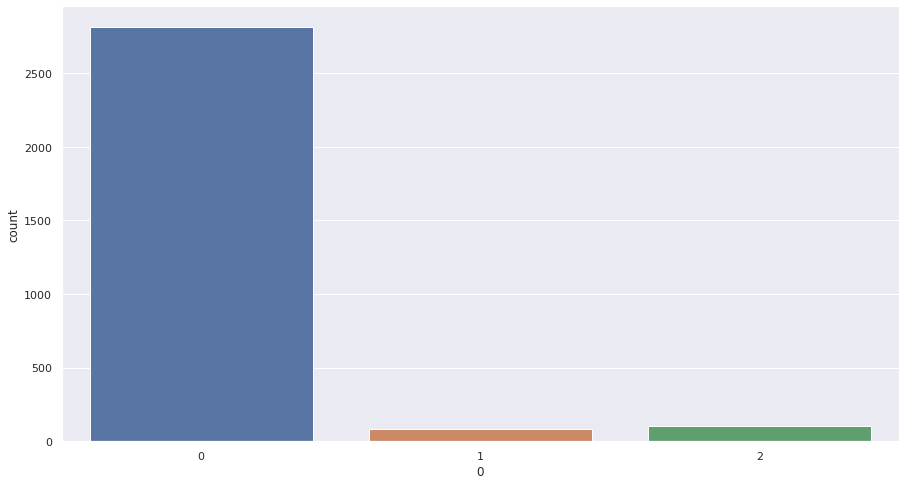

In [50]:
sns.countplot(x=df_results[0]);

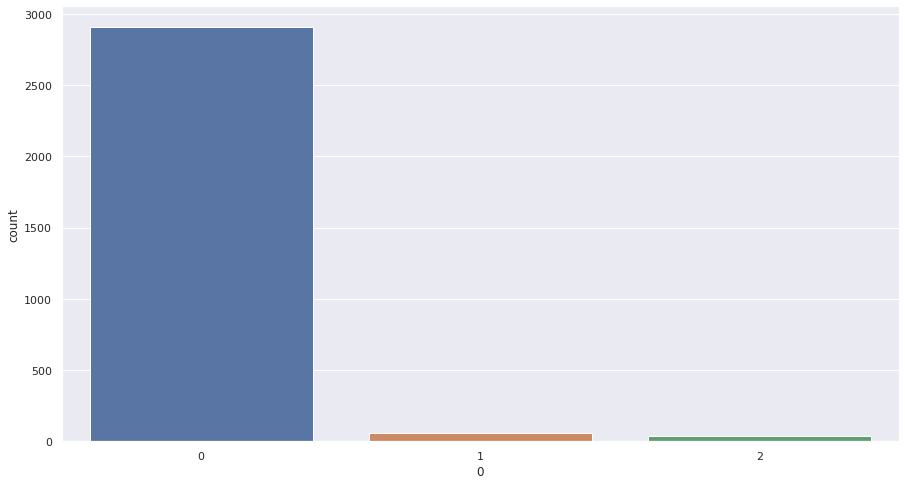

In [62]:
sns.countplot(x=df_results_ros[0]);

In [53]:
df_results[0].value_counts()

0    2813
2     106
1      81
Name: 0, dtype: int64

In [54]:
df['target'].value_counts()

0    6678
1     162
2     160
Name: target, dtype: int64

In [63]:
df_results_ros[0].value_counts()

0    2906
1      57
2      37
Name: 0, dtype: int64

In [64]:
df_results_ros.to_csv('results.csv', index=False)